<a href="https://colab.research.google.com/github/vrushali1423/Dentistry_Eduonix_Capstone_Project/blob/main/Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Aim:** USING DENTAL METRICS TO PREDICT GENDER

**Objective** : The goal of this project is to analyze the data and predict, based on a combination of dental features that describes the Gender of the person.

1.Project Title :Using Dental Metrics to Predict Gender

2.Tech Stack  :Python , Machine Learning

3.Domain : Healthcare

4.Programming  Language used : Python


5.Tools Used : Jupyter Notebook , MS-Excel

**✅Import Libraries**

In [ ]:
#✅ Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, auc, classification_report

**✅Import Data**

In [ ]:
# ✅Import Data
df = pd.read_csv('/content/Dentistry Dataset.csv')
df.head()

,Sl No,Sample ID,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,1,NaN,24,Female,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,2,NaN,22,Female,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,3,NaN,23,Female,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,4,NaN,20,Female,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,5,NaN,20,Female,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246


In [ ]:
# Check shape of data
df.shape

(1100, 14)

The above dataset contains 1100 rows & 14 columns.

In [ ]:
# Check columns names
df.columns

Index(['Sl No', 'Sample ID', 'Age', 'Gender',
       'inter canine distance intraoral', 'intercanine distance casts',
       'right canine width intraoral', 'right canine width casts',
       'left canine width intraoral', 'left canine width casts',
       'right canine index intra oral', 'right canine index casts',
       'left canine index intraoral', 'left canine index casts'],
      dtype='object')

**✅Data Preprocessing**

In [ ]:
#✅ Data preprocessing
# i)Identify & Handle missing values
df.isnull().sum()
df.drop(columns='Sample ID',inplace=True)  # Or handle missing values appropriately (e.g., fillna)

In [ ]:
# Check First Five rows of data
df.head()

,Sl No,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,1,24,Female,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,2,22,Female,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,3,23,Female,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,4,20,Female,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,5,20,Female,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246


In [ ]:
# Check summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Sl No                            1100 non-null   int64  
 1   Age                              1100 non-null   int64  
 2   Gender                           1100 non-null   object 
 3   inter canine distance intraoral  1100 non-null   float64
 4   intercanine distance casts       1100 non-null   float64
 5   right canine width intraoral     1100 non-null   float64
 6   right canine width casts         1100 non-null   float64
 7   left canine width intraoral      1100 non-null   float64
 8   left canine width casts          1100 non-null   float64
 9   right canine index intra oral    1100 non-null   float64
 10  right canine index casts         1100 non-null   float64
 11  left canine index intraoral      1100 non-null   float64
 12  left canine index ca

In [ ]:
# ii)Encoding Categorical Data
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [ ]:
# Check First Few rows
df.head()

,Sl No,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,1,24,0,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,2,22,0,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,3,23,0,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,4,20,0,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,5,20,0,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246


In [ ]:
# iii) Split Independent and Dependent Variables
X = df.drop('Gender', axis=1)
y = df['Gender']

In [ ]:
# iv) Normalize the X Variable
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**✅EDA**

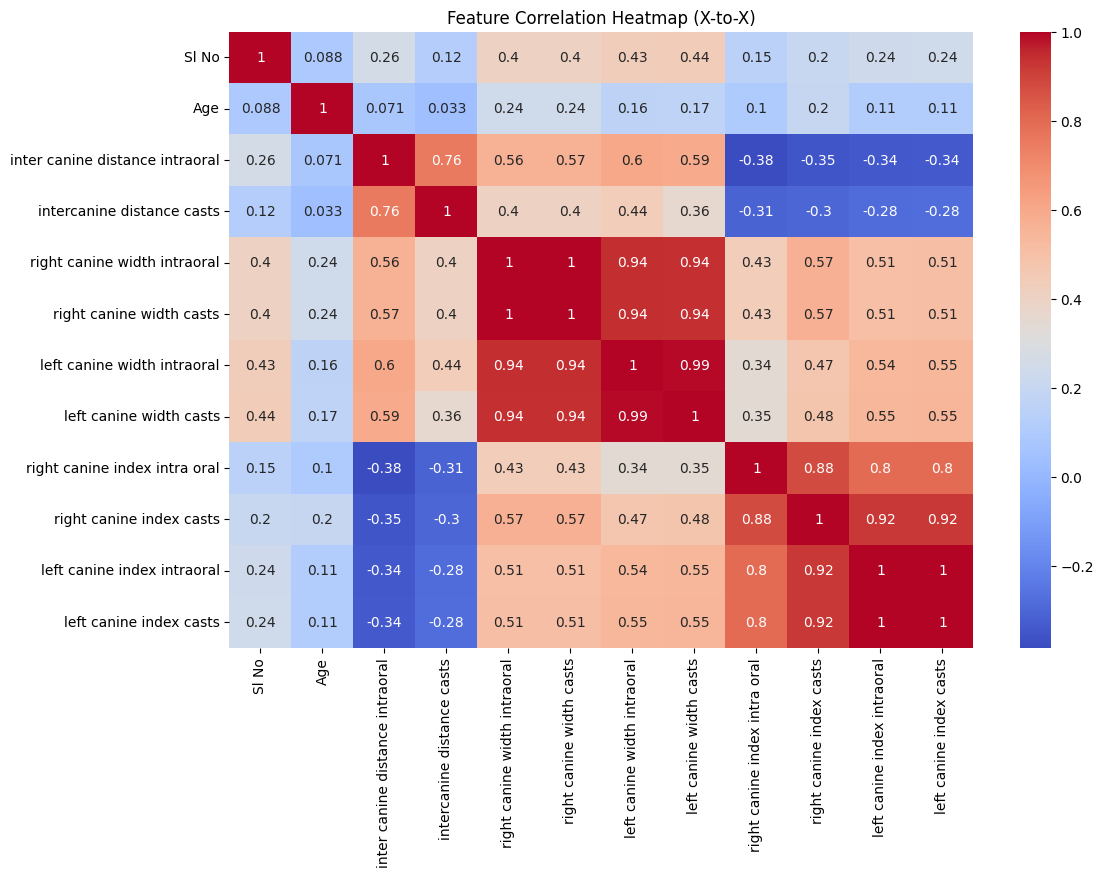

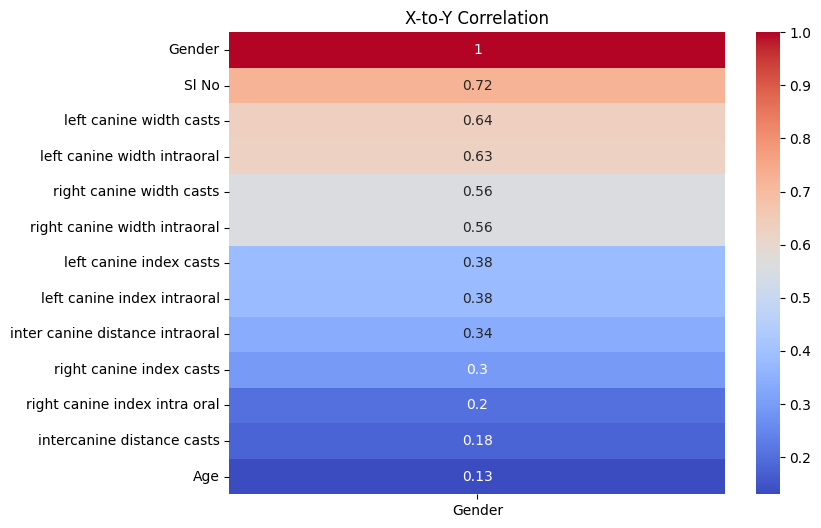

In [ ]:
# ✅ Step 5: Exploratory Data Analysis (EDA)
# Correlation Heatmap
# X-to-X Feature Correlation
plt.figure(figsize=(12, 8))
sns.heatmap(pd.DataFrame(X_scaled, columns=X.columns).corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap (X-to-X)')
plt.show()

# X-to-Y Correlation
df_corr = df.copy()
df_corr['Gender'] = y
plt.figure(figsize=(8, 6))
sns.heatmap(df_corr.corr()[['Gender']].sort_values(by='Gender', ascending=False), annot=True, cmap='coolwarm')
plt.title('X-to-Y Correlation')
plt.show()


Conclusion: There is strong positive correlation between left canine width casts & Gender columns which is 0.64.

**✅Model Building**

In [ ]:
# ✅ Step 6: Model Building
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_prob)
    fpr, tpr, _ = roc_curve(y_test, y_prob)

    results[name] = {
        'model': model,
        'accuracy': acc,
        'auc': auc_score,
        'fpr': fpr,
        'tpr': tpr,
        'y_pred': y_pred
    }

    print(f"{name}:\nAccuracy: {acc:.4f} | AUC: {auc_score:.4f}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("-" * 50)


Logistic Regression:
Accuracy: 0.9182 | AUC: 0.9351
[[111   2]
 [ 16  91]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.93       113
           1       0.98      0.85      0.91       107

    accuracy                           0.92       220
   macro avg       0.93      0.92      0.92       220
weighted avg       0.92      0.92      0.92       220

--------------------------------------------------
Decision Tree:
Accuracy: 0.9955 | AUC: 0.9956
[[112   1]
 [  0 107]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       113
           1       0.99      1.00      1.00       107

    accuracy                           1.00       220
   macro avg       1.00      1.00      1.00       220
weighted avg       1.00      1.00      1.00       220

--------------------------------------------------
Random Forest:
Accuracy: 0.9636 | AUC: 0.9990
[[112   1]
 [  7 100]]
              precision    reca

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:13:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Conclusion : Decision Tree is the best model for our data as compared to Logistic Regression ,Random Forest & XGBoost Classifier models.

**✅Evaluation - ROC Curve**

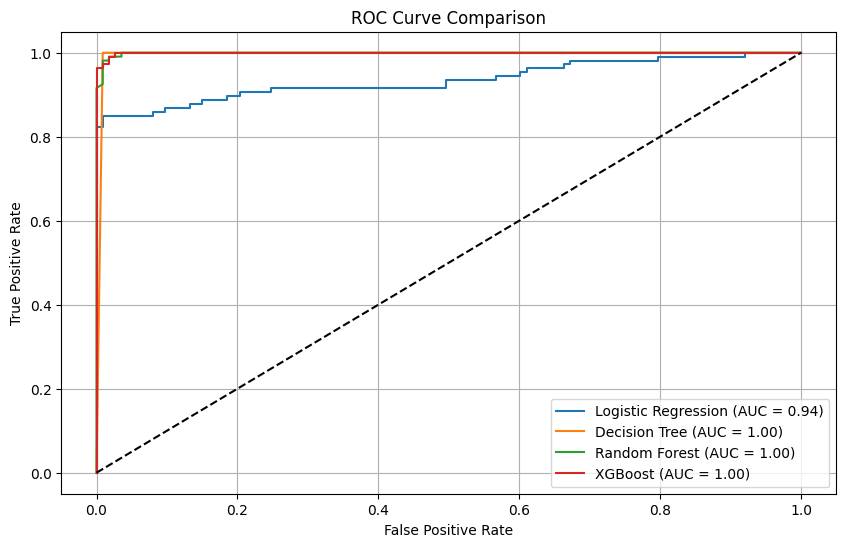

In [ ]:
# ✅ Step 7: Evaluation - ROC Curve
plt.figure(figsize=(10, 6))
for name, res in results.items():
    plt.plot(res['fpr'], res['tpr'], label=f"{name} (AUC = {res['auc']:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.show()